
<table width="100%">
<td style="font-size:45px;font-style:italic;text-align:right;background-color:rgba(0, 220, 170,0.7)">
Exercise set IV
</td></table>



$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{\ket{ #1}\bra{#2}} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathcal H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $
$ \newcommand{\tr}{{\rm Tr}\,} $
$ \newcommand{\boldsig}{\boldsymbol{\sigma}} $
$ \newcommand{\bn}{\boldsymbol{n}}$
$ \newcommand{\boldn}{\boldsymbol{n}} $
$ \newcommand{\Lin}{\hbox{Lin}} $
$ \newcommand{\id}{{\mathbb I}} $

<div class="alert alert-block alert-success">
<b>Exerise 4.1:</b>  
<br>
Suppose that Alice and Bob each use two mutually perpendicular bases $A\perp A'$, and $B\perp B'$, and can rotate them rigidly by an angle $\varphi$ between both sets.
Find the value of the maximum violation of the CHSH inequality in the interval $\varphi \in [0,2\pi]$ (you can use $qiskit$ or do it analytically).
</div>

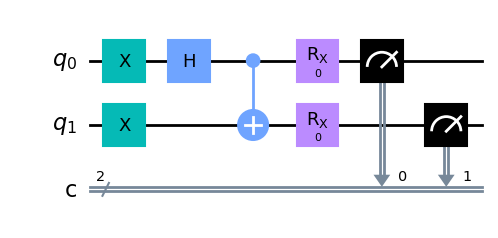

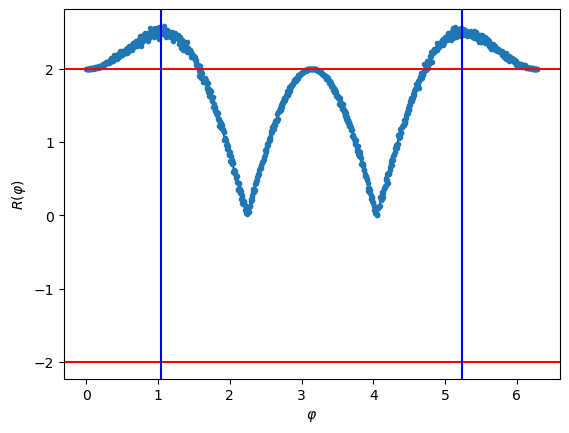

Then, experimentally, the maximum violation is 2.5859375 with phi values 1.0755001877154247


In [74]:
import numpy as np
import matplotlib.pyplot as plt

'angulos de medida'
phi_divs = 1000
phi_list=np.linspace(0,2*np.pi,phi_divs) #lista de angulos'

'lista de correlaciones C[i] a calcular'
C=[0,0,0,0]

'lista de valores de R'
R=np.zeros(phi_divs)

'Numero de medidas'
nshots = 2048

from qiskit import QuantumCircuit, Aer, execute
M_simulator = Aer.get_backend('qasm_simulator')

for j in range(phi_divs): 

    'ángulos de medida'
    phi=phi_list[j] 
    '''A' = 2\phi, A = B = phi, B' = 0'''
    angles_AB=[[phi,phi],[2*phi,phi],[phi,0],[2*phi,0]] # AB , A'B , AB', A'B'

    for i in range(4):        
        'una pareja de ángulos uno para A y otro para B '
        ang_AB=angles_AB[i]

        'hay un circuito para cada proceso de medida'
        qc=QuantumCircuit(2,2)
        'creamos el par de Bell B(11)'
        qc.x(0)
        qc.x(1)
        qc.h(0)
        qc.cx(0,1)

         
        'simulamos la medida en la base de los polarizadores de A y B rotados en torno al eje x'
        qc.rx(-ang_AB[0],0)  # notar el valor negativo del ángulo de rotación 
        qc.rx(-ang_AB[1],1)
        qc.measure([0,1],[0,1])
        
        if j ==0 and i ==0:
            display(qc.draw('mpl'))
        ' medimos '
        counts=execute(qc,backend = M_simulator,shots = nshots).result().get_counts()         
        'construimos el correlador'
        C[i]= 0 
        for bitstring, counts in counts.items():
            C[i] += (-1)**(sum([int(bit) for bit in bitstring])) * counts/nshots 

    'construimos la cantidad R'
    R[j]=np.abs(C[0]+C[1]+C[2]-C[3])

' función analítica '
fx= np.abs(1 + 2*np.cos(phi_list) - np.cos(2*phi_list))

plt.plot(phi_list,fx,'k-',linewidth=1)

' resultado de la simulación'
plt.plot(phi_list,R,'.')
plt.axhline(y = 2, color = 'r', linestyle = '-')
plt.axhline(y = -2, color = 'r', linestyle = '-')

' líneas horizotales en +2 y - 2'
plt.axvline(x = np.pi/3, color = 'b', linestyle = '-')
plt.axvline(x = 5*np.pi/3, color = 'b', linestyle = '-')
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$R(\varphi)$')
plt.show()

maximum = np.nanmax(R)
index = np.argmax(R)
print("Then, experimentally, the maximum violation is {} with phi values {}".format(maximum, phi_list[index]))

<div class="alert alert-block alert-success">
<b>Exercise 4.2:</b> 

a) By evolving the initial state show that the following circuit indeed creates a $\ket{B_{00}}_{AC}$ Bell state between $A$ and $C$.   
<br>
<br>
    
<div>
<img src="ent_swap.png" width="30%" style="margin:auto"/>
 
b) Complete the circuit to teleport a state $\ket{\psi}$ from $A$ to  $C$. Code the final circuit in $qiskit$ and show it works. 
 
</div>

a) RESULTS


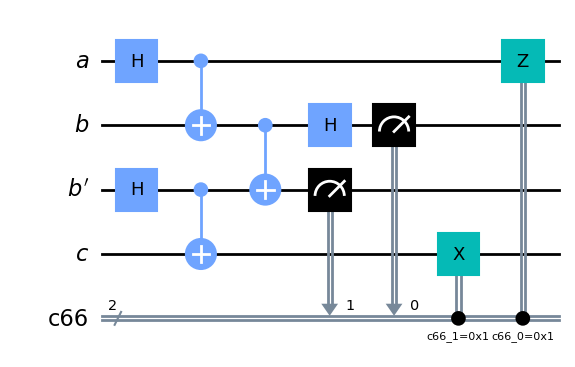

<IPython.core.display.Latex object>

b) RESULTS


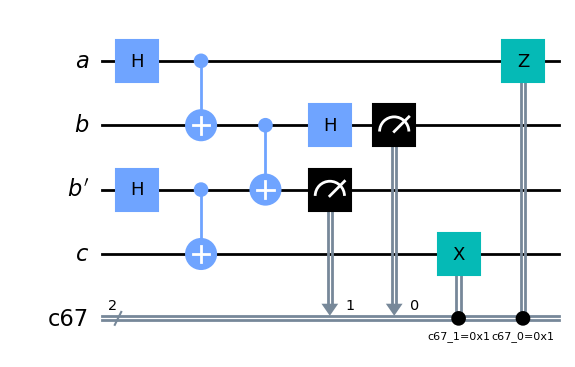

In [77]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, transpile, assemble

def common_circuit():
    # Quantum and classical registers: def of circuit
    qrA = QuantumRegister(1, "a")
    qrB = QuantumRegister(1, "b")
    qrB_ = QuantumRegister(1, "b'")
    qrC = QuantumRegister(1, "c")
    qrlist = [qrA, qrB, qrB_, qrC]
    
    cr = ClassicalRegister(2)
    
    qc = QuantumCircuit(*qrlist, cr)
    
    # Entangler in AB
    qc.h(qrA)
    qc.cx(qrA, qrB)
    
    # Entangler in B'C
    qc.h(qrB_)
    qc.cx(qrB_, qrC)
    
    # Disentangler in BB'
    qc.cx(qrB, qrB_)
    qc.h(qrB)
    
    # Measure to conditionally apply Z and X gates over a and c registers, respectively
    qc.measure([qrB[0], qrB_[0]], cr)
    qc.z(qrA[0]).c_if(cr[0], 1)
    qc.x(qrC[0]).c_if(cr[1], 1)

    return (qc, qrlist, cr)

""" APARTADO a) """
(qc, qrlist, cr) = common_circuit()

# Use the statevector simulator to show that the state is B_00 on a and c
print("a) RESULTS")
S_simulator = Aer.get_backend('statevector_simulator')
statevector = S_simulator.run(assemble(transpile(qc, S_simulator))).result().get_statevector()
display(qc.draw('mpl'))
display(statevector.draw('latex'))

""" APARTADO b) """
print("b) RESULTS")
(qc, qrlist, cr) = common_circuit()

display(qc.draw('mpl'))

In [73]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.extensions import Initialize
from qiskit.providers.aer import AerSimulator

# Create a function to generate the state to be teleported
def create_initial_state():
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.rx(0.5, 0)  # Rotate by 0.5 radians around the x-axis
    state = qc.data
    return state

# Create the Bell state (entangled pair)
def create_bell_pair():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    return qc

# Create the teleportation circuit
def teleportation_circuit():
    # Create quantum registers and classical registers
    qr = QuantumCircuit(3, 3)
    
    # Step 1: Create the entangled Bell pair
    bell_pair = create_bell_pair()
    qr.compose(bell_pair, [1, 2], inplace=True)
    
    # Step 2: Prepare the state to be teleported
    initial_state = create_initial_state()
    prep_state_gate = Initialize(initial_state)
    qr.compose(prep_state_gate, [0], inplace=True)
    
    # Step 3: Perform Bell measurement and apply gates
    qr.cx(0, 1)
    qr.h(0)
    qr.measure([0, 1], [0, 1])
    
    # Step 4: Apply corrections based on measurement results
    qr.z(2).c_if(0, 1)
    qr.x(2).c_if(1, 1)
    
    return qr

# Simulate the teleportation circuit
simulator = AerSimulator()
teleportation_qc = teleportation_circuit()
transpiled_qc = transpile(teleportation_qc, simulator)

# Simulate the quantum circuit
job = assemble(transpiled_qc, shots=1024)
result = simulator.run(job).result()

# Extract and visualize the final state and measurement results
final_state = result.get_statevector()
counts = result.get_counts()

print("Teleportation Circuit:")
print(teleportation_qc)

print("\nFinal State:")
print(final_state)

print("\nMeasurement Results:")
print(counts)

# Plot the Bloch vector of the final state
plot_bloch_multivector(final_state)

# Plot the measurement results
plot_histogram(counts)


/home/jorge.vazquez.perez/miniconda3/envs/basic-quantum/lib/python3.9/site-packages/qiskit/circuit/library/data_preparation/state_preparation.py:201: FutureWarning: The input object of type 'HGate' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'HGate', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  if not math.isclose(sum(np.absolute(params) ** 2), 1.0, abs_tol=_EPS):
/home/jorge.vazquez.perez/miniconda3/envs/basic-quantum/lib/python3.9/site-packages/qiskit/circuit/library/data_preparation/state_preparation.py:201: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depre

TypeError: bad operand type for abs(): 'HGate'

<div class="alert alert-block alert-success">
<b>Exercise 4.3:</b> 
Write a function  $partial\_traces(rho,dA,dB)$ that receives a density matrix $\rho$ and two integers $d_A, d_B$ the dimensions of ${\cal H}_A$ and ${\cal H}_B$ such that $d_A d_B = d$, the dimension of  ${\cal H} = {\cal H}_A\otimes {\cal H}_B$.  The function returns the two density matrices $\rho_A$ and $\rho_B$ obtained through partial traces. 

Verify the result with the matrix  $\rho=\ketbra{\psi}{\psi}$ where $\ket{\psi} = \frac{1}{\sqrt{2}}(\ket{e_1}\ket{e_2} - \ket{e_2}\ket{e_1})$.    
</div>

In [59]:
import numpy as np
import math

def partial_traces(rho, dA, dB):
    # Check if the dimensions are compatible with the input density matrix
    d = dA * dB
    if rho.shape != (d, d):
        raise ValueError("The dimensions do not match the shape of the input density matrix.")

    # Calculate the partial trace over subsystem A
    rho_A = np.zeros((dA, dA), dtype=complex)
    for i in range(dA):
        for j in range(dA):
            for k in range(dB):
                rho_A[i, j] += rho[i * dB + k, j * dB + k]

    # Calculate the partial trace over subsystem B
    rho_B = np.zeros((dB, dB), dtype=complex)
    for i in range(dB):
        for j in range(dB):
            for k in range(dA):
                rho_B[i, j] += rho[k * dB + i, k * dB + j]

    return rho_A, rho_B

# Define the density matrix for the given example

def ket_bra(u, v):
    """Compute the outer product of two statevectors u and v."""
    return [[u_i * complex(v_j.real, -v_j.imag) for v_j in v] for u_i in u]

# Example usage:
psi = [0, 1/math.sqrt(2), -1/math.sqrt(2), 0]
rho_example = np.array(ket_bra(psi, psi))

# Dimensions of the subsystems
dA_example = 2
dB_example = 2

# Compute partial traces
rho_A_example, rho_B_example = partial_traces(rho_example, dA_example, dB_example)

print("Density matrix of the system (rho):")
print(rho_example)
print("\nPartial Trace over Subsystem A (rho_A):")
print(rho_A_example)
print("\nPartial Trace over Subsystem B (rho_B):")
print(rho_B_example)
    

Density matrix of the system (rho):
[[ 0. +0.j  0. +0.j  0. -0.j  0. +0.j]
 [ 0. +0.j  0.5+0.j -0.5-0.j  0. +0.j]
 [-0. +0.j -0.5+0.j  0.5+0.j -0. +0.j]
 [ 0. +0.j  0. +0.j  0. -0.j  0. +0.j]]

Partial Trace over Subsystem A (rho_A):
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]

Partial Trace over Subsystem B (rho_B):
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]


 <div class="alert alert-block alert-success">
<b>Exercise 4.4:</b> 
Consider the 3-qubit  state $\ket{\psi} =  \hbox{CNOT}(1,0)\hbox{CNOT}(0,2)H(1) R_x(\alpha,0)\ket{000}$
with $\alpha = \pi/3$. Let the qubits 01 span subsystem $A$, and 2 the subsystem $B$.
    
- Compute the partial traces $\rho_B =\tr_{01}\rho $ and $\rho_A =\tr_{2}\rho~$ where $\rho = \ket{\psi}\bra{\psi}$. Obtain their purity.
<br>    
    
- experimentally compute $\langle  Z_2\rangle_\psi = \langle I\otimes I\otimes   Z\rangle_\psi $ and compare it with the prediction $\tr (Z\cdot\rho_B)$
<br>

- experimentally compute $\langle Z_0Z_1 \rangle_\psi $ and compare it with the prediction $\tr (Z \otimes Z\cdot \rho_{A})$
<br>    

- Repeat for $\langle X_2\rangle_\psi$  and $\langle Z_0X_1\rangle_\psi$ 

Note: you can chose to do the exercise either manually or using $qiskit$, or bothways.
</div>

 <div class="alert alert-block">

- Compute the partial traces $\rho_B =\tr_{01}\rho $ and $\rho_A =\tr_{2}\rho~$ where $\rho = \ket{\psi}\bra{\psi}$. Obtain their purity.
  
</div>

In [89]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import partial_trace
import numpy as np

# Define the parameters
alpha = np.pi / 3

# Create a 3-qubit quantum circuit
qc = QuantumCircuit(3)

# Apply CNOT gates and Hadamard gate
qc.cx(1, 0)
qc.cx(0, 2)
qc.h(1)

# Apply the Rx gate with parameter alpha to qubit 0
qc.rx(alpha, 0)

# Compute the density matrix
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
statevector = np.asarray(job.result().get_statevector())
rho = np.outer(statevector, statevector.conj())

# Calculate the reduced density matrices
rho_A = np.matrix(partial_trace(statevector, [0,1]))
rho_B = np.matrix(partial_trace(statevector, [2]))

# Compute purity
purity_A = np.trace(np.dot(rho_A, rho_A))
purity_B = np.trace(np.dot(rho_B, rho_B))

print("Reduced Density Matrix (A):\n", rho_A)
print("\nReduced Density Matrix (B):\n", rho_B)
print("\nPurity of rho_A:", "{:.3f}".format(purity_A))
print("Purity of rho_B:", "{:.3f}".format(purity_B))

Reduced Density Matrix (A):
 [[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]

Reduced Density Matrix (B):
 [[0.375+0.j         0.   +0.21650635j 0.375+0.j         0.   +0.21650635j]
 [0.   -0.21650635j 0.125+0.j         0.   -0.21650635j 0.125+0.j        ]
 [0.375+0.j         0.   +0.21650635j 0.375+0.j         0.   +0.21650635j]
 [0.   -0.21650635j 0.125+0.j         0.   -0.21650635j 0.125+0.j        ]]

Purity of rho_A: 1.000+0.000j
Purity of rho_B: 1.000+0.000j


 <div class="alert alert-block">

- experimentally compute $\langle  Z_2\rangle_\psi = \langle I\otimes I\otimes   Z\rangle_\psi $ and compare it with the prediction $\tr (Z\cdot\rho_B)$  
</div>